In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib

In [4]:
import os

In [5]:
function_level_df = pd.read_csv("../results/linevul_functions.csv", sep=";")

In [6]:
function_level_df = function_level_df.set_index("Transformation")

In [7]:
def remove_base(series):
    base = series[0]
    return pd.Series(map(lambda val: (val - base)/base*100, series), series.index)
    # return pd.Series(map(lambda val: (val - base)/val, series), series.index)

function_level_df_normalized = function_level_df.apply(remove_base)
function_level_df_normalized = function_level_df_normalized.drop(float("nan"))
function_level_df_normalized

,ReVeal,CGIN,StackLSTM,CodeT5+,CodeT5+_n,CodeT5+_t,LineVul,LineVul_n,LineVul_t
Transformation,,,,,,,,,
Chromium,0.078653,1.121040,0.000000,-37.423378,-20.072159,0.084019,-36.878290,-17.866539,0.061340
Mozilla,0.031461,-0.259951,0.079631,-37.455083,-19.975947,0.084019,-38.049200,-19.122220,0.061340
Google,-0.062923,3.038180,0.000000,-37.476221,-20.384847,0.084019,-36.674186,-18.213346,0.061340
LLVM,-0.220230,-1.917141,0.079631,-37.634750,-19.975947,0.084019,-36.910517,-18.416647,0.061340
Uglify,-2.013528,-5.735175,-2.787068,-46.448954,-33.108839,-7.040833,-45.815877,-33.305429,-7.529520
Uglify (-Whitespace),-1.116879,-5.004062,-2.787068,-42.771084,-31.004209,-6.990422,-46.814910,-33.173882,-6.425395
Obfuscate,-20.544282,-3.476848,-19.190954,-43.341788,-28.550812,2.050076,-44.021914,-31.487682,-6.854777
Obfuscate (+Format),-20.622935,-8.822096,-19.238732,-60.748256,-30.090198,2.823055,-56.429262,-35.900502,-5.781322
Obfuscate (-Whitespace),-21.724084,-10.186840,-15.400541,-44.990488,-32.904390,-6.738363,-45.192824,-35.804831,-6.578746


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
fin

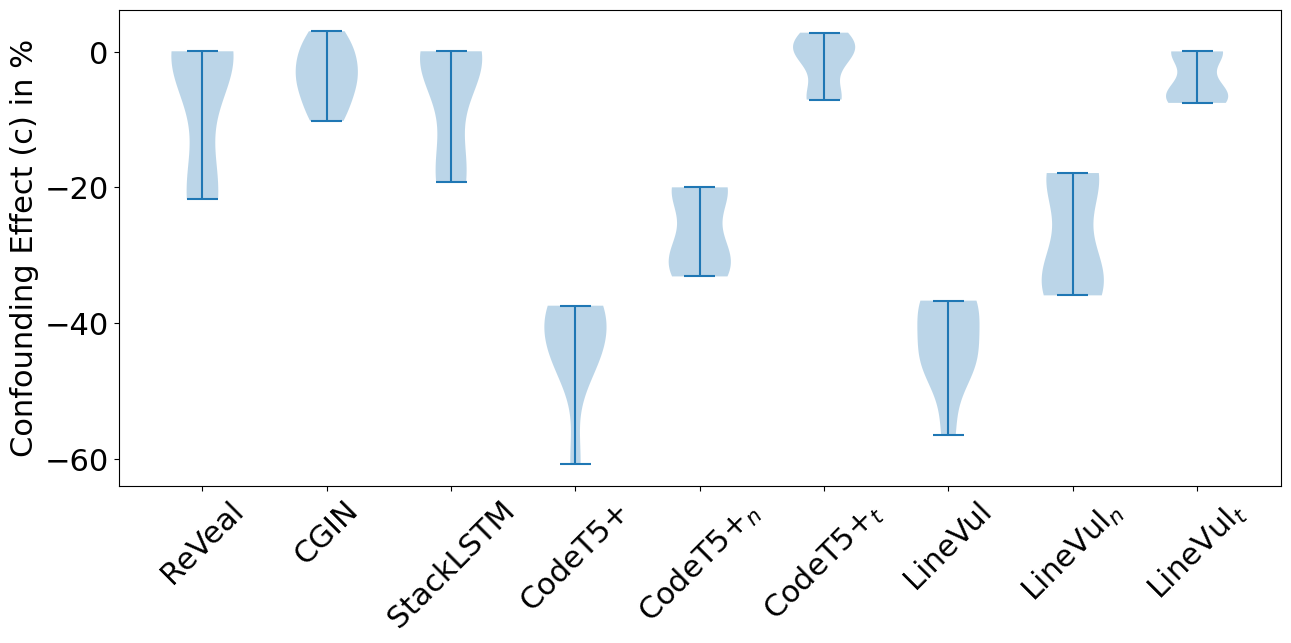

In [8]:
models = function_level_df_normalized.columns
model_labels = [
    model.replace("_n", "$_n$").replace("_t", "$_t$")
    for model in models
]
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,7))
plt.violinplot(
    [function_level_df_normalized[model] for model in models]
    )
plt.xticks(list(range(1, len(models)+1)), labels=model_labels, rotation=45)
plt.gcf().subplots_adjust(bottom=0.2)
# plt.xlabel("Model")
plt.ylabel("Confounding Effect (c) in %")
plt.savefig("function-level-drop.pdf")

In [10]:
def plot_topk(filename):
    topkacc_df = pd.read_csv(filename, sep=";")
    topkacc_df = topkacc_df.set_index("Codestyle")

    def remove_random(series):
        random_perf = series[0]
        return pd.Series(map(lambda x: x - random_perf, series), index=series.index)

    topkacc_df_normalized = topkacc_df.apply(remove_random, axis=1).drop("Random", axis=1).apply(remove_base).drop(float("nan"))

    models = topkacc_df_normalized.columns
    model_labels = [
        model.replace("_n", "$_n$").replace("_t", "$_t$")
        for model in models
    ]
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 22}

    matplotlib.rc('font', **font)

    plt.figure(figsize=(15,7))
    plt.violinplot(
        [topkacc_df_normalized[model] for model in models]
        )
    plt.xticks(list(range(1, len(models)+1)), labels=model_labels, rotation=45)
    plt.gcf().subplots_adjust(bottom=0.2)
    plt.ylabel("Confounding Effect (c) in %")
    plt.savefig(f"{os.path.split(filename)[1].split('.')[0]}.pdf")

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

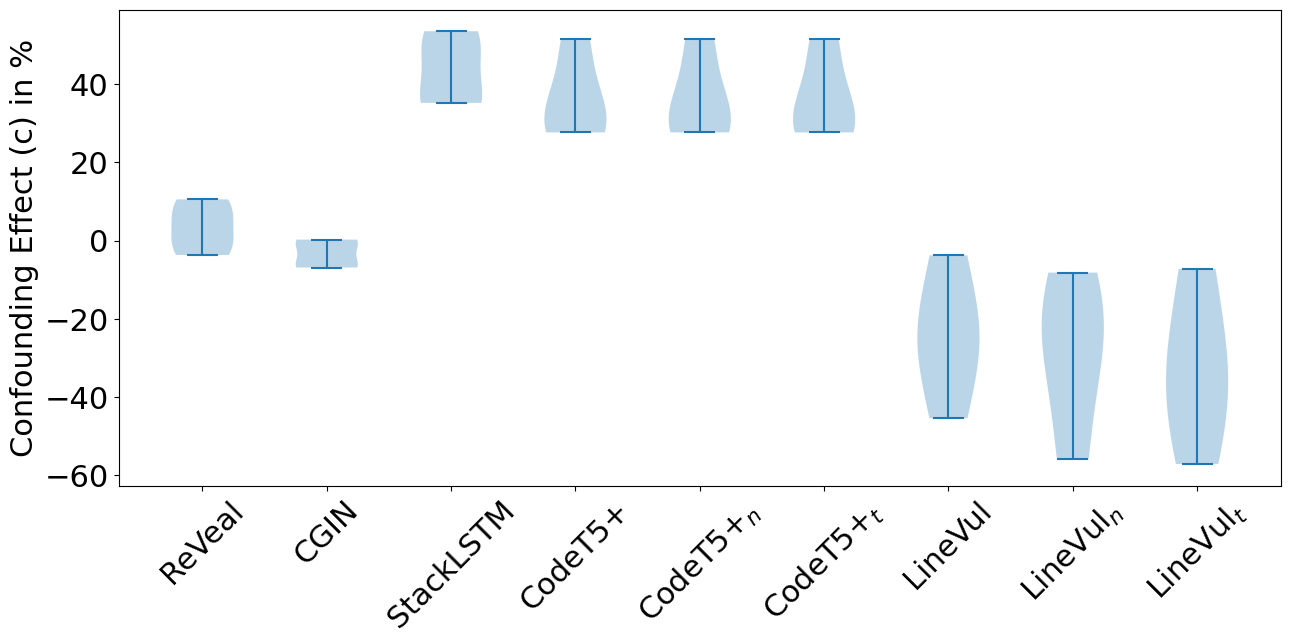

In [11]:
plot_topk("../results/linevul_top1.csv")

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

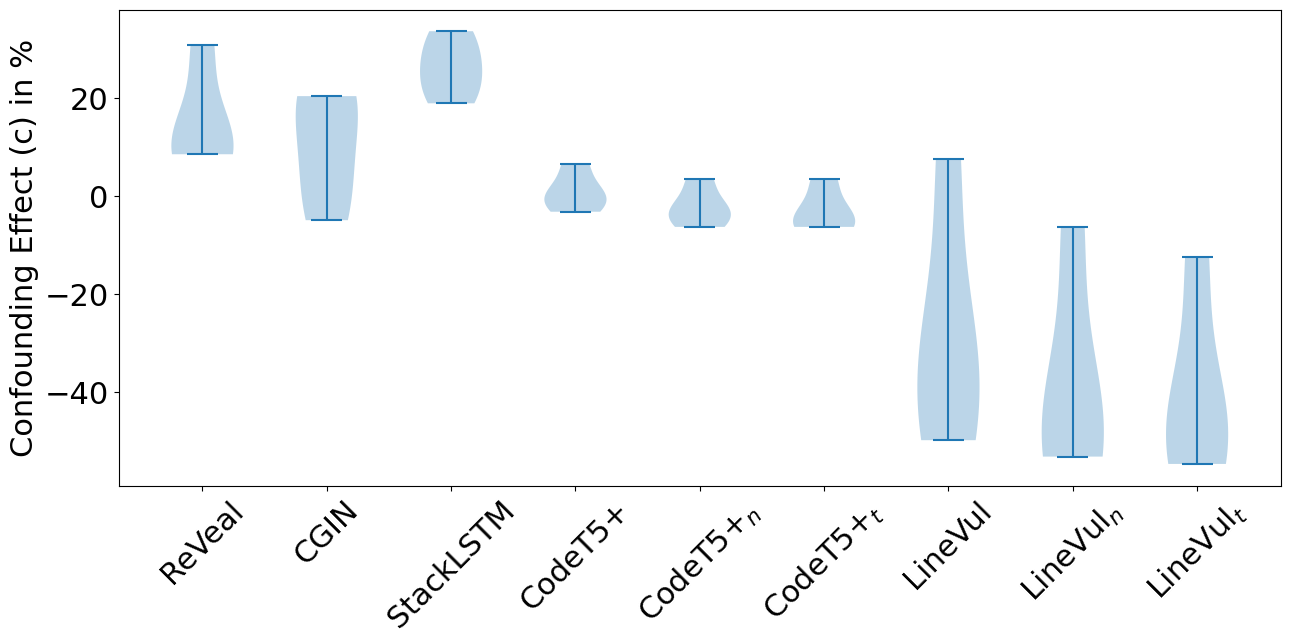

In [12]:
plot_topk("../results/linevul_top3.csv")

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

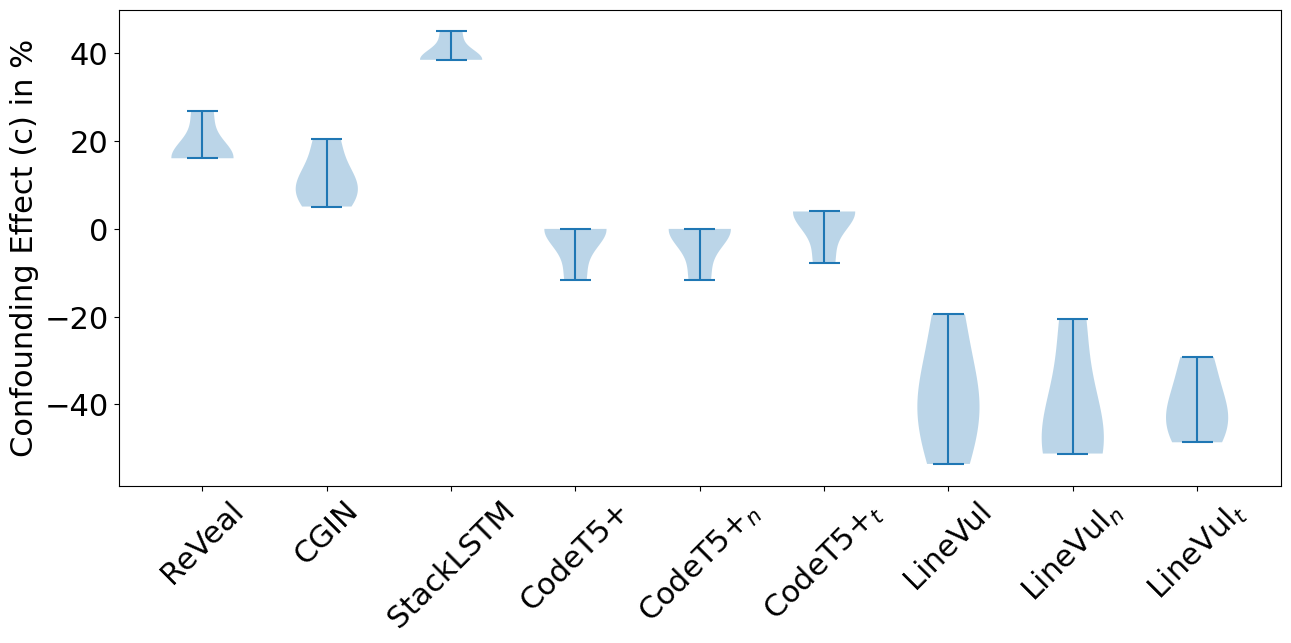

In [13]:
plot_topk("../results/linevul_top5.csv")